In [61]:
import pandas as pd
pd.set_option('display.max_colwidth', 250)
pd.set_option('max_rows', 2500)
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import os
import numpy as np
import nltk
import pickle
import gensim
from wordcloud import WordCloud
from datetime import datetime
from PIL import Image
from gensim import corpora
from nltk.tag.stanford import StanfordPOSTagger
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
greve_twitter = pd.read_csv('greve_twitter_classif2.csv',index_col=[0])

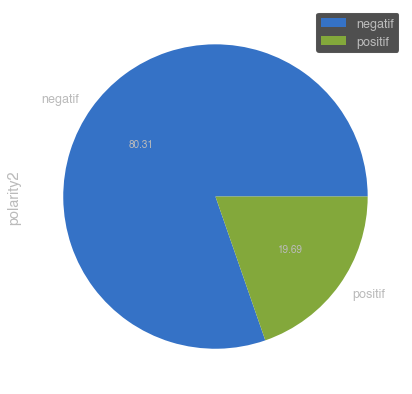

In [147]:
greve_twitter.polarity2.value_counts().plot.pie(figsize=(7,7), autopct='%.2f')
plt.legend()
plt.savefig('greve_pie.png')
plt.show()

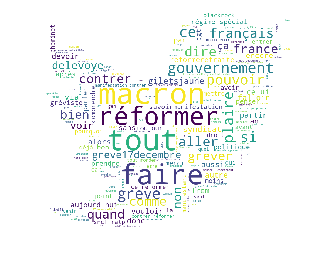

In [50]:
twitter_mask = np.array(Image.open("./twitter_mask.png")) 
stopwords=['reformedesretraites','réformedesretraites','retraiter','grevegenerale']
all_text= ' '.join([x for x in greve_twitter.tweet_processed2])
wordcloud = WordCloud(background_color='white',random_state=21,
                      max_font_size=110,width=1800,
                      height=1400,
                      stopwords=stopwords,mask=twitter_mask).generate(all_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./my_twitter_wordcloud_2.png', dpi=1200)
plt.show()

In [51]:
greve_twitter.date = greve_twitter.date.map(lambda x: str(x)[:-15])

In [52]:
greve_twitter['date']= pd.to_datetime(greve_twitter['date'])

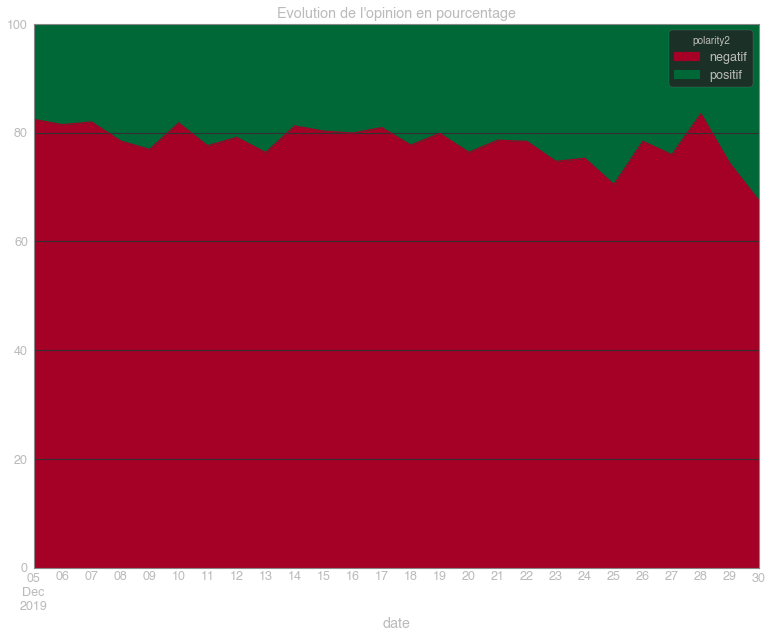

In [57]:
data = greve_twitter.groupby(["date","polarity2"]).size()#/data.polarity2.count()*100
data_perc = data.unstack()
data_perc = data_perc.divide(data_perc.sum(axis=1),axis=0)*100
ax = data_perc.plot.area(figsize=(13,10), colormap='RdYlGn',ylim=(0,100))
plt.title("Evolution de l'opinion en pourcentage")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

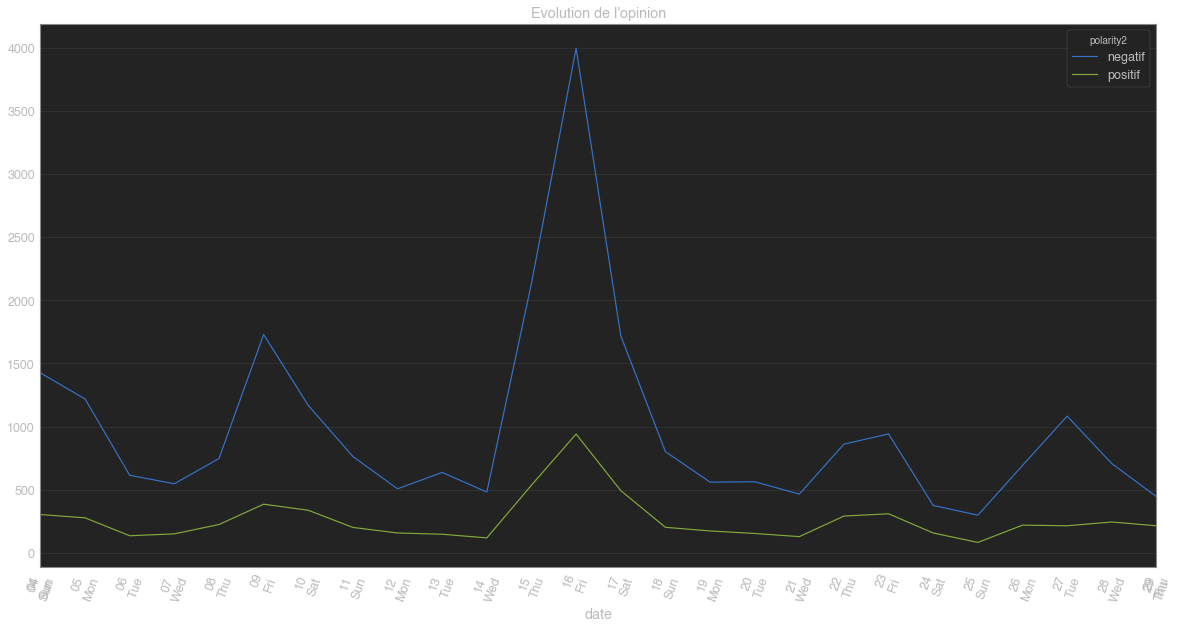

In [54]:
data = greve_twitter.groupby(["date","polarity2"]).size()
ax= data.unstack().plot(figsize=(20,10),rot=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%a'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d\n%a'))
plt.title("Evolution de l'opinion")
plt.show
#début grève 5/12, PM 'transitions progressives', manif 10/12,démission Delevoye 16/12, 
# manif 17/12 (3x plus de manif que le 10), 27/12 cap de la plus longue grève contre retraites (1995)

In [418]:
#séparation des dataframes en positif et negatif
greve_negatif = greve_twitter[greve_twitter.polarity=='negatif']
greve_positif = greve_twitter[greve_twitter.polarity=='positif']

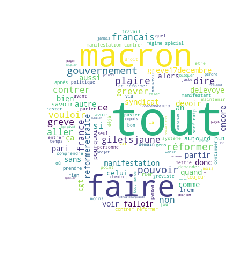

In [482]:
#df négatifs + wordcloud
text_negatif = ' '.join([x for x in greve_negatif.tweet_processed2])
sad_mask = np.array(Image.open("./sad.png"))
all_text= ' '.join([x for x in greve_twitter.tweet_processed2])
wordcloud = WordCloud(background_color='white',random_state=21,
                      max_font_size=110, width=1800,
                      height=1400,
                      stopwords=stopwords,mask=sad_mask).generate(text_negatif)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./sad_wordcloud.png', dpi=1200)
plt.show()

In [483]:
neg_word=greve_negatif.tweet_processed2.str.split(expand=True).stack().value_counts()
neg_word.head(10)

reformedesretraites    15109
retraiter               6346
macron                  2547
contrer                 2458
plaire                  2337
tout                    2314
faire                   2237
giletsjaunes            1861
réformer                1833
grevegenerale           1690
dtype: int64

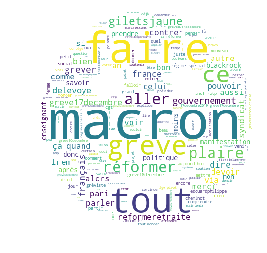

In [484]:
#df positifs + wordcloud
text_positif = ' '.join([x for x in greve_positif.tweet_processed2])
happy_mask = np.array(Image.open("./happy.png")) 
stopwords=['reformedesretraites','réformedesretraites','retraiter','grevegenerale']
all_text= ' '.join([x for x in greve_twitter.tweet_processed2])
wordcloud = WordCloud(background_color='white',random_state=21,
                      max_font_size=110,width=1800,
                      height=1400,
                      stopwords=stopwords,mask=happy_mask).generate(text_positif)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./happy_wordcloud.png', dpi=1200)
plt.show()

In [485]:
text_positifok = text_positif.split()

In [486]:
len(text_positifok)

202909

In [487]:
pos_word=greve_positif.tweet_processed2.str.split(expand=True).stack().value_counts()
pos_word.head(10)

reformedesretraites    14285
retraiter               3235
macron                  2151
giletsjaunes            1705
faire                   1682
tout                    1677
réformedesretraites     1418
grevegenerale           1402
greve                   1292
greve17decembre         1280
dtype: int64

In [488]:
stopwords0=['réformedesretraites','retraiter','grevegenerale','reformedesretraites']
text_data=[]
text_data1=[]
text_data0 = greve_twitter['tweet_processed2'].tolist()
for x in text_data0:
    text_data1.append(nltk.word_tokenize(x))
for y in text_data1:
    y=[word for word in y if word not in stopwords0]
    text_data.append(y)

In [489]:
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(x) for x in text_data if x not in stopwords0]
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [490]:
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.048*"contrer" + 0.030*"manifestation" + 0.016*"mobilisation" + 0.014*"ruer" + 0.013*"manifestant" + 0.012*"pari" + 0.011*"cortège" + 0.009*"aujourd" + 0.009*"hui" + 0.009*"5decembre"')
(1, '0.019*"faire" + 0.017*"plaire" + 0.015*"tout" + 0.013*"aller" + 0.012*"ça" + 0.011*"ce" + 0.010*"réformer" + 0.010*"régime" + 0.009*"dire" + 0.009*"macron"')
(2, '0.044*"grevedu5decembre" + 0.043*"giletsjaunes" + 0.040*"macron" + 0.033*"greve5decembre" + 0.025*"greve17decembre" + 0.024*"reformeretraites" + 0.023*"sncf" + 0.022*"greve" + 0.020*"ratp" + 0.014*"5decembre2019"')
(3, '0.022*"grever" + 0.014*"greve10decembre" + 0.011*"lyon" + 0.010*"000" + 0.008*"delevoye" + 0.008*"contrer" + 0.008*"décembre" + 0.008*"cgt" + 0.007*"5decembre" + 0.007*"via"')
(4, '0.017*"tout" + 0.014*"an" + 0.011*"faire" + 0.009*"celui" + 0.009*"gouvernement" + 0.009*"réformer" + 0.008*"français" + 0.008*"ce" + 0.008*"pouvoir" + 0.008*"aller"')


In [500]:
d = {}
x=0
while x < len(topics):
    for topic[x] in topics:
        topic[x] = list(topic[x])
        topic[x] = "".join(map(str,topic[x]))
        topic[x] = topic[x].split('"')[1::2]
        x+=1
topic

[['contrer',
  'manifestation',
  'mobilisation',
  'ruer',
  'manifestant',
  'pari',
  'cortège',
  'aujourd',
  'hui',
  '5decembre'],
 ['faire',
  'plaire',
  'tout',
  'aller',
  'ça',
  'ce',
  'réformer',
  'régime',
  'dire',
  'macron'],
 ['grevedu5decembre',
  'giletsjaunes',
  'macron',
  'greve5decembre',
  'greve17decembre',
  'reformeretraites',
  'sncf',
  'greve',
  'ratp',
  '5decembre2019'],
 ['grever',
  'greve10decembre',
  'lyon',
  '000',
  'delevoye',
  'contrer',
  'décembre',
  'cgt',
  '5decembre',
  'via'],
 ['tout',
  'an',
  'faire',
  'celui',
  'gouvernement',
  'réformer',
  'français',
  'ce',
  'pouvoir',
  'aller'],
 'réformer',
 'français',
 'ce',
 'pouvoir',
 'aller']

In [502]:
df_topic1 = pd.DataFrame(topic[1], columns=['words'])
df_topic2 = pd.DataFrame(topic[2], columns=['words'])
df_topic3 = pd.DataFrame(topic[3], columns=['words'])
df_topic4 = pd.DataFrame(topic[4], columns=['words'])
df_topic5 = pd.DataFrame(topic[0], columns=['words'])

In [503]:
df_topic1

,words
0,faire
1,plaire
2,tout
3,aller
4,ça
5,ce
6,réformer
7,régime
8,dire
9,macron


In [504]:
df_topic2

,words
0,grevedu5decembre
1,giletsjaunes
2,macron
3,greve5decembre
4,greve17decembre
5,reformeretraites
6,sncf
7,greve
8,ratp
9,5decembre2019


In [505]:
df_topic3

,words
0,grever
1,greve10decembre
2,lyon
3,000
4,delevoye
5,contrer
6,décembre
7,cgt
8,5decembre
9,via


In [506]:
df_topic4

,words
0,tout
1,an
2,faire
3,celui
4,gouvernement
5,réformer
6,français
7,ce
8,pouvoir
9,aller


In [507]:
df_topic5

,words
0,contrer
1,manifestation
2,mobilisation
3,ruer
4,manifestant
5,pari
6,cortège
7,aujourd
8,hui
9,5decembre


In [ ]:
java_path = "C:\\Program Files (x86)\\Java\\jre1.8.0_231\\bin\\java.exe"
os.environ['JAVAHOME'] = java_path
path_to_model = "./stanford-postagger-full-2018-10-16/models/french.tagger"
path_to_jar = "./stanford-postagger-full-2018-10-16/stanford-postagger.jar"
tagger=StanfordPOSTagger(path_to_model, path_to_jar)

print(tagger.tag(sentence.split()))

In [252]:
adj_pos1 = [word for word, tags in tagger.tag(text_positif.split()[0:6999]) if tags==('ADJ')] 

In [254]:
adj_pos2 = [word for word, tags in tagger.tag(text_positif.split()[7000:13999]) if tags==('ADJ')] 

In [256]:
adj_pos3 = [word for word, tags in tagger.tag(text_positif.split()[15000:20999]) if tags==('ADJ')] 

In [257]:
adj_pos4 = [word for word, tags in tagger.tag(text_positif.split()[22000:27999]) if tags==('ADJ')] 

In [260]:
adj_pos5 = [word for word, tags in tagger.tag(text_positif.split()[28000:32999]) if tags==('ADJ')] 

In [261]:
adj_pos6 = [word for word, tags in tagger.tag(text_positif.split()[35000:40999]) if tags==('ADJ')] 

In [262]:
adj_pos7 = [word for word, tags in tagger.tag(text_positif.split()[42000:47999]) if tags==('ADJ')] 

In [263]:
adj_pos8 = [word for word, tags in tagger.tag(text_positif.split()[48000:53999]) if tags==('ADJ')] 

In [264]:
adj_pos9 = [word for word, tags in tagger.tag(text_positif.split()[55000:59999]) if tags==('ADJ')] 

In [265]:
adj_pos10 = [word for word, tags in tagger.tag(text_positif.split()[60000:64999]) if tags==('ADJ')] 

In [266]:
adj_pos11 = [word for word, tags in tagger.tag(text_positif.split()[65000:69999]) if tags==('ADJ')] 

In [267]:
adj_pos12 = [word for word, tags in tagger.tag(text_positif.split()[70000:74999]) if tags==('ADJ')] 

In [268]:
adj_pos13 = [word for word, tags in tagger.tag(text_positif.split()[75000:79999]) if tags==('ADJ')] 

In [269]:
adj_pos14 = [word for word, tags in tagger.tag(text_positif.split()[80000:84999]) if tags==('ADJ')] 

In [270]:
adj_pos15 = [word for word, tags in tagger.tag(text_positif.split()[85000:89999]) if tags==('ADJ')] 

In [271]:
adj_pos16 = [word for word, tags in tagger.tag(text_positif.split()[90000:94999]) if tags==('ADJ')] 

In [272]:
adj_pos17 = [word for word, tags in tagger.tag(text_positif.split()[95000:99999]) if tags==('ADJ')] 

In [273]:
adj_pos18 = [word for word, tags in tagger.tag(text_positif.split()[100000:104999]) if tags==('ADJ')] 

In [274]:
adj_pos19 = [word for word, tags in tagger.tag(text_positif.split()[105000:109999]) if tags==('ADJ')] 

In [275]:
adj_pos20 = [word for word, tags in tagger.tag(text_positif.split()[110000:114999]) if tags==('ADJ')] 

In [276]:
adj_pos21 = [word for word, tags in tagger.tag(text_positif.split()[115000:119999]) if tags==('ADJ')] 

In [277]:
adj_pos22 = [word for word, tags in tagger.tag(text_positif.split()[120000:124999]) if tags==('ADJ')] 

In [278]:
adj_pos23 = [word for word, tags in tagger.tag(text_positif.split()[125000:129999]) if tags==('ADJ')] 

In [279]:
adj_pos24 = [word for word, tags in tagger.tag(text_positif.split()[130000:134999]) if tags==('ADJ')] 

In [280]:
adj_pos25 = [word for word, tags in tagger.tag(text_positif.split()[160000:165999]) if tags==('ADJ')] 

In [281]:
adj_pos26 = [word for word, tags in tagger.tag(text_positif.split()[167000:171999]) if tags==('ADJ')] 

In [282]:
adj_pos27 = [word for word, tags in tagger.tag(text_positif.split()[173000:177999]) if tags==('ADJ')] 

In [287]:
adj_pos28 = [word for word, tags in tagger.tag(text_positif.split()[198000:-1]) if tags==('ADJ')] 

In [304]:
adj_pos = adj_pos1+adj_pos2+adj_pos3+adj_pos4+adj_pos5+adj_pos6+adj_pos7+adj_pos8+adj_pos9+adj_pos10+adj_pos11+adj_pos12+adj_pos13+adj_pos14+adj_pos15+adj_pos16+adj_pos17+adj_pos18+adj_pos19+adj_pos20+adj_pos21+adj_pos22+adj_pos23+adj_pos24+adj_pos25+adj_pos26+adj_pos27+adj_pos28


In [305]:
stopwords=['reformedesretraites','réformedesretraites','retraiter','grevegenerale','giletsjaunes','greve17decembre','17decembre2019','noël','ratp','greve','macron','autre','delevoye','grevedu17decembre','tout']

In [306]:
for word in adj_pos:
    if word in stopwords:
        adj_pos.remove(word)

In [307]:
df=pd.DataFrame.from_dict(nltk.FreqDist(adj_pos),orient='index')
df = df.sort_values(by=0, ascending=False).reset_index()
df.columns=['mot','freq']
df.head(10)

,mot,freq
0,français,487
1,bon,479
2,reformedesretraites,383
3,grand,331
4,social,314
5,gréviste,274
6,france,258
7,nouveau,247
8,petit,238
9,grevegenerale,230


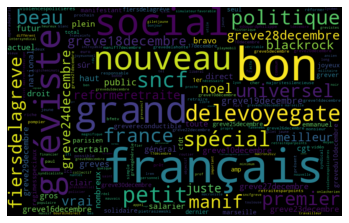

In [309]:
adj_pos = ' '.join(adj_pos)
wordcloud = WordCloud(width=800, height=500, random_state=21,max_font_size=110,stopwords=stopwords).generate(adj_pos)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('greve_pos_mots.png')